# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga

# Dataset Loading and preprocessing

In [2]:
dataset = pd.read_csv('march.week3.038.csv' ,header=0, parse_dates=['te'],nrows=1000000,  names=[ 'te', 'td', 'sa', 'da','sp', 'dp', 'pr', 'flg', 'fwd', 'stos', 'pkt', 'byt','class'],index_col='te' )

In [3]:
dataset = dataset.drop(columns=['sa','da','fwd','stos'])

In [4]:
dataset_normal = dataset[dataset['class']=='background']

In [5]:
dataset_spam = dataset[dataset['class']=='anomaly-spam']

In [6]:
dataset_normal = dataset_normal.sample(50000)

In [7]:
dataset_spam =dataset_spam.sample(50000)

In [8]:
dataset_normal_train = dataset_normal.iloc[0:25000,:]
dataset_normal_test = dataset_normal.iloc[25001:,:]
dataset_spam_train = dataset_spam.iloc[0:25000,:]
dataset_spam_test = dataset_spam.iloc[25001:,:]

In [9]:
print(dataset_normal_train.shape)
print(dataset_normal_test.shape)
print(dataset_spam_train.shape)
print(dataset_spam_test.shape)

(25000, 8)
(24999, 8)
(25000, 8)
(24999, 8)


# Feature Selection

# td statistics

(array([2.4581e+04, 1.3100e+02, 6.6000e+01, 1.8000e+01, 1.0000e+01,
        1.3000e+01, 8.0000e+00, 5.0000e+00, 3.0000e+00, 1.6500e+02]),
 array([  0.    ,  31.1032,  62.2064,  93.3096, 124.4128, 155.516 ,
        186.6192, 217.7224, 248.8256, 279.9288, 311.032 ]),
 <BarContainer object of 10 artists>)

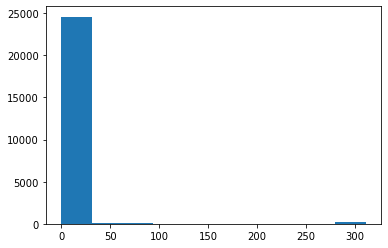

In [10]:
plt.hist(dataset_normal_train['td'])

In [11]:
print('td normal max:',dataset_normal_train['td'].max())
print('td normal min:',dataset_normal_train['td'].min())
print('td normal mean:',dataset_normal_train['td'].mean())
print('td normal std:',dataset_normal_train['td'].std())

td normal max: 311.032
td normal min: 0.0
td normal mean: 4.833556960000007
td normal std: 26.308917120899373


In [12]:
dataset_normal_train['td'].value_counts()

0.000     9997
0.004      132
0.032       97
0.252       81
2.996       77
          ... 
8.548        1
16.004       1
21.020       1
19.924       1
10.816       1
Name: td, Length: 3349, dtype: int64

(array([6.0860e+03, 1.2924e+04, 3.6520e+03, 1.0410e+03, 4.4300e+02,
        2.9100e+02, 1.5900e+02, 1.3800e+02, 1.0400e+02, 4.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+01,
        3.0000e+01, 2.6000e+01, 1.4000e+01, 1.9000e+01, 1.4000e+01,
        1.8000e+01, 1.0000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

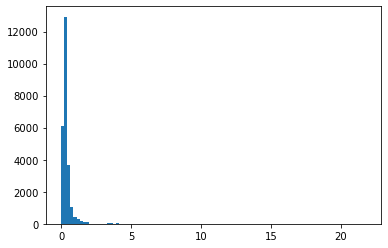

In [13]:
plt.hist(dataset_spam_train['td'],bins=100)

In [14]:
dataset_spam_train['td'].value_counts()

0.140    919
0.268    890
0.264    814
0.272    759
0.144    737
        ... 
3.492      1
4.868      1
4.312      1
3.736      1
9.252      1
Name: td, Length: 551, dtype: int64

In [15]:
print('td normal max:',dataset_spam_train['td'].max())
print('td normal min:',dataset_spam_train['td'].min())
print('td normal mean:',dataset_spam_train['td'].mean())
print('td normal std:',dataset_spam_train['td'].std())

td normal max: 21.764
td normal min: 0.0
td normal mean: 0.39005696000000933
td normal std: 0.4209595016051191


# sp statistics

(array([9656.,  220.,  228.,  313.,  149.,  263.,  309.,  206.,  148.,
         346.,  137.,  296.,  114.,  140.,  117.,  115.,  322.,  110.,
         100.,  124.,  286.,  180.,  113.,  100.,  125.,  299.,  329.,
         317.,  311.,  301.,  396.,  287.,  305.,  317.,  311.,  323.,
         315.,  532.,  773.,  699.,  545.,  549.,  517.,  510.,  522.,
         514.,  523.,  508.,  371.,  409.]),
 array([    0.  ,  1310.62,  2621.24,  3931.86,  5242.48,  6553.1 ,
         7863.72,  9174.34, 10484.96, 11795.58, 13106.2 , 14416.82,
        15727.44, 17038.06, 18348.68, 19659.3 , 20969.92, 22280.54,
        23591.16, 24901.78, 26212.4 , 27523.02, 28833.64, 30144.26,
        31454.88, 32765.5 , 34076.12, 35386.74, 36697.36, 38007.98,
        39318.6 , 40629.22, 41939.84, 43250.46, 44561.08, 45871.7 ,
        47182.32, 48492.94, 49803.56, 51114.18, 52424.8 , 53735.42,
        55046.04, 56356.66, 57667.28, 58977.9 , 60288.52, 61599.14,
        62909.76, 64220.38, 65531.  ]),
 <BarContainer o

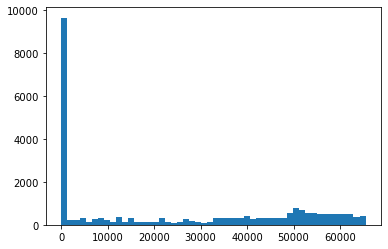

In [16]:
plt.hist(dataset_normal_train['sp'],bins=50)

In [17]:
dataset_normal_train['sp'].value_counts()

80       3324
53       2543
443      2391
0         575
13008     226
         ... 
43590       1
41122       1
55738       1
48911       1
49922       1
Name: sp, Length: 11749, dtype: int64

(array([12370.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,    83.,   251.,   255.,
          246.,   273.,   278.,   262.,   272.,   249.,   282.,   276.,
          257.,   283.,   312.,   254.,   296.,   275.,   270.,   268.,
          280.,   259.,   273.,   272.,   263.,   259.,   260.,   274.,
          281.,   292.,   296.,   292.,   252.,   293.,   275.,   278.,
          232.,   274.,   271.,   253.,   308.,   266.,   283.,   280.,
          260.,   276.,   278.,   308.]),
 array([2.500000e+01, 6.347400e+02, 1.244480e+03, 1.854220e+03,
        2.463960e+03, 3.073700

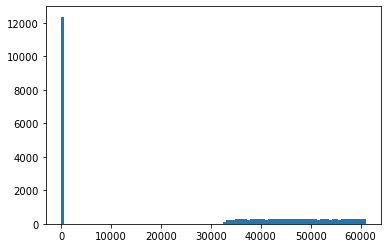

In [18]:
plt.hist(dataset_spam_train['sp'],bins=100)

In [19]:
dataset_spam_train['sp'].value_counts()

25       12370
47563        5
37890        5
50380        5
41897        5
         ...  
48589        1
48334        1
55889        1
48654        1
46439        1
Name: sp, Length: 10210, dtype: int64

# dp statistics

(array([11993.,   227.,   206.,   247.,    90.,   384.,   288.,   146.,
           99.,   425.,    88.,   339.,    70.,    86.,    59.,    90.,
          251.,    66.,    70.,    73.,   236.,   132.,    98.,    62.,
           81.,   299.,   272.,   297.,   211.,   267.,   376.,   254.,
          273.,   239.,   269.,   272.,   248.,   449.,   607.,   670.,
          452.,   478.,   460.,   476.,   493.,   380.,   383.,   365.,
          286.,   318.]),
 array([    0.  ,  1310.68,  2621.36,  3932.04,  5242.72,  6553.4 ,
         7864.08,  9174.76, 10485.44, 11796.12, 13106.8 , 14417.48,
        15728.16, 17038.84, 18349.52, 19660.2 , 20970.88, 22281.56,
        23592.24, 24902.92, 26213.6 , 27524.28, 28834.96, 30145.64,
        31456.32, 32767.  , 34077.68, 35388.36, 36699.04, 38009.72,
        39320.4 , 40631.08, 41941.76, 43252.44, 44563.12, 45873.8 ,
        47184.48, 48495.16, 49805.84, 51116.52, 52427.2 , 53737.88,
        55048.56, 56359.24, 57669.92, 58980.6 , 60291.28, 61601.96

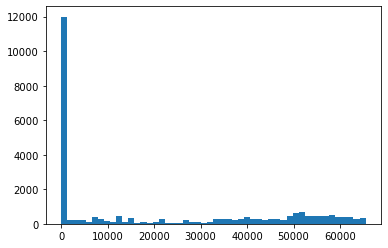

In [20]:
plt.hist(dataset_normal_train['dp'],bins=50)

In [21]:
dataset_normal_train['dp'].value_counts()

53       3657
80       3294
443      2383
445      1252
13008     340
         ... 
54911       1
36172       1
41285       1
60612       1
29229       1
Name: dp, Length: 9393, dtype: int64

(array([12630.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,    79.,   283.,   239.,
          257.,   288.,   263.,   237.,   255.,   248.,   270.,   266.,
          255.,   280.,   272.,   252.,   260.,   266.,   256.,   252.,
          267.,   255.,   259.,   281.,   298.,   260.,   263.,   280.,
          263.,   279.,   281.,   281.,   278.,   281.,   285.,   267.,
          232.,   295.,   283.,   249.,   279.,   253.,   257.,   276.,
          253.,   272.,   265.,   300.]),
 array([2.500000e+01, 6.347400e+02, 1.244480e+03, 1.854220e+03,
        2.463960e+03, 3.073700

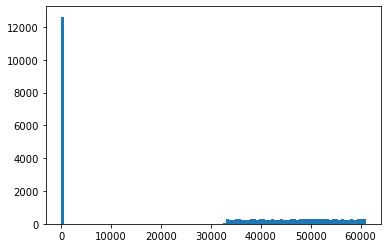

In [22]:
plt.hist(dataset_spam_train['dp'],bins=100)

In [23]:
dataset_spam_train['dp'].value_counts()

25       12630
60215        5
60485        5
46584        4
56329        4
         ...  
48136        1
33828        1
48805        1
48533        1
57953        1
Name: dp, Length: 10043, dtype: int64

# pr statistics

(array([1.5862e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.5500e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.4000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.7000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 a

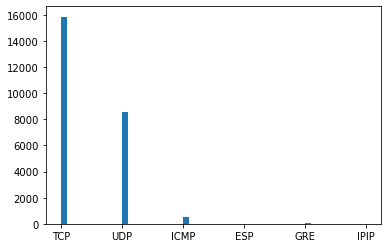

In [24]:
plt.hist(dataset_normal_train['pr'],bins=50)

In [25]:
dataset_normal_train['pr'].value_counts()

TCP     15862
UDP      8550
ICMP      540
GRE        27
ESP        18
IPIP        3
Name: pr, dtype: int64

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25000.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 50 artists>)

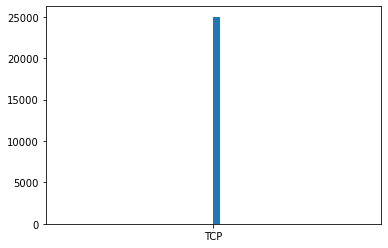

In [26]:
plt.hist(dataset_spam_train['pr'],bins=50)

In [27]:
dataset_spam_train['pr'].value_counts()

TCP    25000
Name: pr, dtype: int64

# flg statistics

(array([6.297e+03, 0.000e+00, 1.295e+03, 0.000e+00, 0.000e+00, 9.955e+03,
        0.000e+00, 2.029e+03, 0.000e+00, 0.000e+00, 1.270e+03, 0.000e+00,
        0.000e+00, 3.580e+02, 0.000e+00, 1.142e+03, 0.000e+00, 0.000e+00,
        3.110e+02, 0.000e+00, 0.000e+00, 5.220e+02, 0.000e+00, 7.400e+01,
        0.000e+00, 0.000e+00, 7.990e+02, 0.000e+00, 2.000e+02, 0.000e+00,
        0.000e+00, 3.440e+02, 0.000e+00, 0.000e+00, 6.700e+01, 0.000e+00,
        2.070e+02, 0.000e+00, 0.000e+00, 9.300e+01, 0.000e+00, 0.000e+00,
        2.300e+01, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 4.000e+00]),
 array([ 0.  ,  0.38,  0.76,  1.14,  1.52,  1.9 ,  2.28,  2.66,  3.04,
         3.42,  3.8 ,  4.18,  4.56,  4.94,  5.32,  5.7 ,  6.08,  6.46,
         6.84,  7.22,  7.6 ,  7.98,  8.36,  8.74,  9.12,  9.5 ,  9.88,
        10.26, 10.64, 11.02, 11.4 , 11.78, 12.16, 12.54, 12.92, 13.3 ,
        13.68, 14.06, 14.44, 14.82, 15.2 , 15.58, 15.96, 16.34, 16.72,
        17.1 , 17.48,

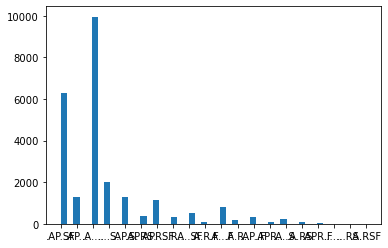

In [28]:
plt.hist(dataset_normal_train['flg'],bins=50)

In [29]:
dataset_normal_train['flg'].value_counts()

.A....    9955
.AP.SF    6297
....S.    2029
.AP...    1295
.AP.S.    1270
.APRSF    1142
.A...F     799
.A..SF     522
.APRS.     358
.AP..F     344
...R..     311
.A..S.     207
.A.R..     200
.A.RS.      93
.A.R.F      74
.APR..      67
.APR.F      23
......       5
...RS.       5
.A.RSF       4
Name: flg, dtype: int64

(array([12370.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12537.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    93.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]),
 <BarContainer object of 50 artists>)

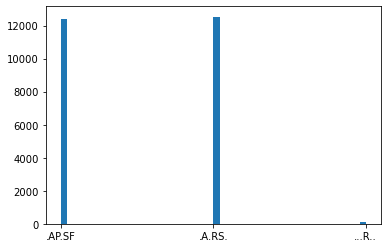

In [30]:
plt.hist(dataset_spam_train['flg'],bins=50)

In [31]:
dataset_spam_train['flg'].value_counts()

.A.RS.    12537
.AP.SF    12370
...R..       93
Name: flg, dtype: int64

# pkt statistics

(array([2.4879e+04, 5.4000e+01, 1.8000e+01, 1.8000e+01, 1.0000e+01,
        4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

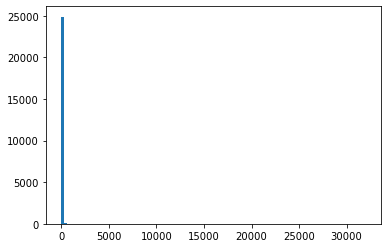

In [32]:
plt.hist(dataset_normal_train['pkt'],bins=100)

In [33]:
print('td normal max:',dataset_normal_train['pkt'].max())
print('td normal min:',dataset_normal_train['pkt'].min())
print('td normal mean:',dataset_normal_train['pkt'].mean())
print('td normal std:',dataset_normal_train['pkt'].std())

td normal max: 31995
td normal min: 1
td normal mean: 15.63196
td normal std: 308.4462367249898


In [34]:
dataset_normal_train['pkt'].value_counts()

1      9509
2      3054
5      1636
3      1550
4      1482
       ... 
780       1
748       1
100       1
199       1
340       1
Name: pkt, Length: 343, dtype: int64

(array([9.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.2322e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.2497e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.3000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.7000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6000e+01]),
 array([ 1.  ,  1.18,  1.36,  1.54,  1.72,  1.9 ,  2.08,  2.26,  2.44,
         2.62,  2.8 ,  2.98,  3.16,  3.34,  3.52,  3.7 ,  3.88,  4.06,
         4.24,  4.42,  4.6 ,  4.78,  4.96,  5.14,  5.32,  5.5 ,  5.68,
         5.86,  6.04,  6.22,  6.4 ,  6.58,  6.76,  6.94,  7.12,  7.3 ,
         7.48,  7.66,  7.84,  8.02

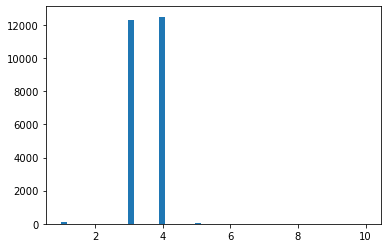

In [35]:
plt.hist(dataset_spam_train['pkt'],bins=50)

In [36]:
dataset_spam_train['pkt'].value_counts()

4     12497
3     12322
1        92
5        53
6        17
10       16
8         1
7         1
2         1
Name: pkt, dtype: int64

# byt statistics

(array([2.4973e+04, 1.3000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.80000000e+01, 8.56566700e+05, 1.71310540e+06, 2.56964410e+06,
        3.42618280e+06, 4.28272150e+06, 5.13926020e+06, 5.99579890e+06,
        6.85233760e+06, 7.70887630e+06, 8.56541500e+06, 9.42195370e+06,
        1.02784924e+07, 1.11350311e+07, 1.19915698e+07, 1.28481085e+07,
        1.37046472e+07, 1.4561

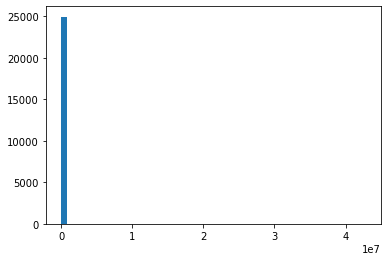

In [37]:
plt.hist(dataset_normal_train['byt'],bins=50)

In [38]:
print('byt normal max:',dataset_normal_train['byt'].max())
print('byt normal min:',dataset_normal_train['byt'].min())
print('byt normal mean:',dataset_normal_train['byt'].mean())
print('byt normal std:',dataset_normal_train['byt'].std())

byt normal max: 42826963
byt normal min: 28
byt normal mean: 8672.43244
byt normal std: 305167.43906491


In [39]:
dataset_normal_train['byt'].value_counts()

96       1315
52        795
40        745
80        633
64        449
         ... 
8644        1
21342       1
2950        1
43741       1
11970       1
Name: byt, Length: 4540, dtype: int64

(array([9.2000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.2467e+04, 1.2322e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.2000e+01, 2.9000e+01, 2.1000e+01,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6000e+01]),
 array([ 40.  ,  50.24,  60.48,  70.72,  80.96,  91.2 , 101.44, 111.68,
        121.92, 132.16, 142.4 , 152.64, 162.88, 173.12, 183.36, 193.6 ,
        203.84, 214.08, 224.32, 234.56, 244.8 , 255.04, 265.28, 275.52,
        285.76, 296.  , 306.24, 316.48, 326.72, 336.96, 347.2 , 357.44,
        367.68, 377.92, 388.16

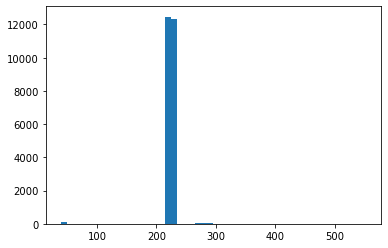

In [40]:
plt.hist(dataset_spam_train['byt'],bins=50)

In [41]:
dataset_spam_train['byt'].value_counts()

216    12467
230    12322
40        92
276       27
268       22
290       21
552       16
460       15
348        9
280        2
350        2
320        1
410        1
432        1
388        1
80         1
Name: byt, dtype: int64

In [42]:
print('byt spam max:',dataset_spam_train['byt'].max())
print('byt spam min:',dataset_spam_train['byt'].min())
print('byt spam mean:',dataset_spam_train['byt'].mean())
print('byt spam std:',dataset_spam_train['byt'].std())

byt spam max: 552
byt spam min: 40
byt spam mean: 222.87216
byt spam std: 17.20430575349723


# Genetic Algorithm implementation

In [43]:
def gen_chromosome():
    sp = random.choice([25,-1])
    dp = random.choice([25,-1])
    pr = random.choice(['TCP'])
    flg =random.choice(['.AP.SF','.A.RS.','...R..',-1])
    pkt = random.choice([1,2,3,4,5,6,7,8,9,10,-1])
    byt = random.choice([40,216,230,268,276,290,348,460,552,-1])
    return [sp,dp,pr,flg,pkt,byt]

In [44]:
def fitness(chromosome):
    N = dataset_normal_train.shape[0] + dataset_spam_train.shape[0]
    AB = 0   # counter for if A then B that maches both the condition and result
    A = 0  # counter for records that satisfy the condition only
    for i in range(dataset_spam_train.shape[0]):
        if (chromosome[0]== -1) or (dataset_spam_train.iloc[i,1]==chromosome[0]):
            if (chromosome[1]== -1) or (dataset_spam_train.iloc[i,2]==chromosome[1]):
                if (chromosome[2]== -1) or (dataset_spam_train.iloc[i,3]==chromosome[2]):
                    if (chromosome[3]== -1) or (dataset_spam_train.iloc[i,4]==chromosome[3]):
                        if (chromosome[4]== -1) or (dataset_spam_train.iloc[i,5]==chromosome[4]):
                            if (chromosome[5]== -1) or (dataset_spam_train.iloc[i,6]==chromosome[5]):
                                AB += 1
         
        if (chromosome[0]== -1) or (dataset_normal_train.iloc[i,1]==chromosome[0]):
            if (chromosome[1]== -1) or (dataset_normal_train.iloc[i,2]==chromosome[1]):
                if (chromosome[2]== -1) or (dataset_normal_train.iloc[i,3]==chromosome[2]):
                    if (chromosome[3]== -1) or (dataset_normal_train.iloc[i,4]==chromosome[3]):
                        if (chromosome[4]== -1) or (dataset_normal_train.iloc[i,5]==chromosome[4]):
                            if (chromosome[5]== -1) or (dataset_normal_train.iloc[i,6]==chromosome[5]):
                                A += 1
    support = AB / N
    if AB==0 and A==0:
        confidence = 0
    else:
        confidence = AB/(AB+A)
    fitness = 0.2 * support + 0.8 * confidence
    return fitness 
        

In [45]:
def gen_population(size):
    return [gen_chromosome() for x in range(size)]

In [46]:
def evaluate_population(pop):
    pop_fitness =  list(map(lambda x: fitness(x), pop))
    return  pop_fitness

In [47]:
def roulette_selection(pop,pop_fitness, n):
    total = sum(pop_fitness)
    i = 0
    w, v = pop_fitness[0], pop[0]
    while n:
        x = total * (1 - random.random() ** (1.0 / n))
        total -= x
        while x > w:
            x -= w
            i += 1
            w, v = pop_fitness[i], pop[i]
        w -= x
        yield v
        n -= 1

In [48]:
def uniform_crossover(a,b):
    mask = [random.randint(0,1) for i in range(len(a))]
    c=[0,'',0,'',0,0]
    d=[0,'',0,'',0,0]
    for i in range(len(a)):
        if mask[i]:
            c[i]=a[i]
            d[i]=b[i]
        else:
            c[i]=b[i]
            d[i]=a[i]
    return c,d

In [49]:
def mutation(child):
    child[3]=random.choice(['.AP.SF','.A.RS.','...R..',-1])
    child[4] = random.choice([1,2,3,4,5,6,7,8,9,10,-1])
    child[5] = random.choice([40,216,230,268,276,290,348,460,552,-1])
    return child

In [50]:
def train_ga(generations_count,population_size,P_CROSSOVER=0.7,P_MUTATION = 0.3):
    maxvalue = 0                                             # highest fitness value in the population
    maxvalues = []                                           # index for each generation
    generations = []                                         # genes of each generation
    initial_population = gen_population(population_size)
    current_pop = initial_population
    for generation in range(generations_count):
        pop_fitness = evaluate_population(current_pop)
        result = list(zip(current_pop,pop_fitness))     
        maxvalue = max(pop_fitness) 
        maxvalues.append(maxvalue)
        generations.append(generation)
        print(f'Generation id:{generation} MaxValue: {maxvalue}')
        print(f'\n generation {generation} population and fitness values \n" {result} \n')
        offspring = []
        while len(offspring) < population_size:
            parent1=[]
            parent2= []
            
            # selection of genes (roullette wheel selection)
            parent1,parent2 = roulette_selection(current_pop,pop_fitness,2)
                
            if random.random() < P_CROSSOVER:
                child1, child2 = uniform_crossover(parent1,parent2)         # crossover of genes to produce offspring
            else:
                child1 = parent1
                child2 = parent2
            
            if random.random() < P_MUTATION:
                child1 = mutation(child1)                           # mutation of genes to produce offspring

            offspring.append(child1)
            offspring.append(child2)
            
        print(offspring)
        current_pop = offspring
        
    
    plt.plot(generations,maxvalues)
    plt.ylabel('Fitness')
    plt.xlabel('Generation id')
    plt.title('GA-Training ')

    plt.show()    
        

Generation id:0 MaxValue: 0.7751048421052632

 generation 0 population and fitness values 
" [([25, 25, 'TCP', '.AP.SF', -1, 552], 0.0), ([25, 25, 'TCP', '...R..', 9, 290], 0.0), ([-1, 25, 'TCP', '.AP.SF', -1, -1], 0.0), ([-1, 25, 'TCP', -1, 6, 276], 0.0), ([-1, -1, 'TCP', '.AP.SF', 9, 276], 0.0), ([-1, 25, 'TCP', '...R..', -1, 40], 0.7751048421052632), ([25, 25, 'TCP', '...R..', 4, 230], 0.0), ([25, 25, 'TCP', '...R..', 7, 230], 0.0), ([-1, 25, 'TCP', '...R..', 6, 348], 0.0), ([25, -1, 'TCP', -1, 10, 268], 0.0), ([25, 25, 'TCP', '...R..', 2, 348], 0.0), ([25, -1, 'TCP', '.AP.SF', 2, 348], 0.0), ([-1, -1, 'TCP', -1, 5, 40], 0.0), ([-1, 25, 'TCP', -1, 8, 268], 0.0), ([25, 25, 'TCP', '.AP.SF', 2, 460], 0.0), ([-1, 25, 'TCP', '...R..', 4, 216], 0.0), ([25, 25, 'TCP', '...R..', 8, 276], 0.0), ([25, -1, 'TCP', '.AP.SF', 1, 460], 0.0), ([-1, -1, 'TCP', '.AP.SF', 4, 460], 0.0), ([25, 25, 'TCP', '.A.RS.', 2, 216], 0.0)] 

[[-1, 25, 'TCP', '...R..', -1, 40], [-1, 25, 'TCP', '...R..', -1, 40], [

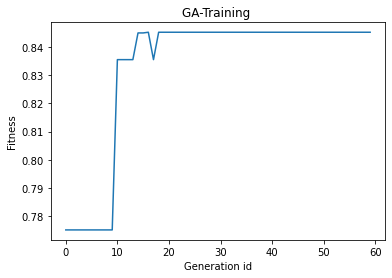

In [51]:
train_ga(60,20,0.9,0.4)

In [52]:
#data_spam_train_1 = dataset_spam_train.drop(['td','class'],axis=1)

In [53]:
#data_normal_train_1 = dataset_normal_train.drop(['td','class'],axis=1)

In [54]:
#data_spam_train_1.to_csv(r'd:\matlab_files\dataset_spam_train.csv',index=False)

In [55]:
#data_normal_train_1.to_csv(r'd:\matlab_files\dataset_normal_train.csv',index=False)

In [56]:
#data_spam_test_1 = dataset_spam_test.drop(['td','class'],axis=1)

In [57]:
#data_normal_test_1 = dataset_normal_test.drop(['td','class'],axis=1)

In [58]:
#data_spam_test_1.to_csv(r'd:\matlab_files\dataset_spam_test.csv',index=False)

In [59]:
#data_normal_test_1.to_csv(r'd:\matlab_files\dataset_normal_test.csv',index=False)